# Intern Name - Vishal Rajendra Patil

# Student,s Percentage Prediction Model

# Task 1

To Explore Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. Data can be found at [http://bit.ly/w-data]


What will be the predicted score if a student studies for 9.25 hrs in a day?

# Importing the Required Libraries 

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Reading data

In [3]:
#Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values and hence data cleaning is not required.

Let's plot this data that we have on 2-D graph to eyeball our dataset and see if we can manually find any kind of relationship between the two parameters - Hours and Scores.



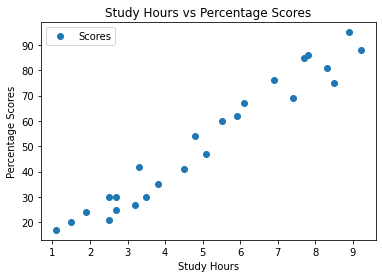

In [5]:
#Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Scores')
plt.show()


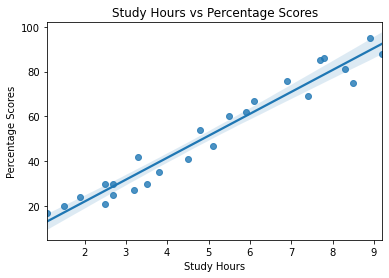

In [6]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=data['Hours'], y=data['Scores'], data=data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Scores')
plt.show()

From the graph above, it can be clearly seen that there is a positive linear relation between the number of hours studied and percentage of scores

# Preparing our Data

Next is to define our "attributes"(input variable) and "labels"(output variable)

In [7]:
X = data.iloc[:, :-1].values #Attributes
y = data.iloc[:, 1].values   #Labels

Now that we have the attributes and labels defined, the next step is to split the dataset into training and test sets

In [8]:
#Using Scikit-learn's built-in trail-test-split() method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Using Scikit-Learn library

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training Complete.")


Training Complete.


In [11]:
print("Coefficient - ", regressor.coef_)
print("Intercept - ", regressor.intercept_)


Coefficient -  [9.68207815]
Intercept -  2.826892353899737


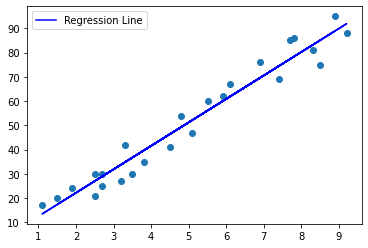

In [12]:
#Plotting the Regression Line
line = regressor.coef_ * X + regressor.intercept_

#Plotting for test data
plt.scatter(X, y)
plt.plot(X, line, color = 'blue', label = 'Regression Line')
plt.legend()
plt.show()

# Marking Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
print(X_test)
y_pred = regressor.predict(X_test) #Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [15]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [16]:
#Estimating training and test score
print("Training score: ", regressor.score(X_train, y_train))
print("Test score: ", regressor.score(X_test, y_test))

Training score:  0.9491209376364416
Test score:  0.9678055545167994


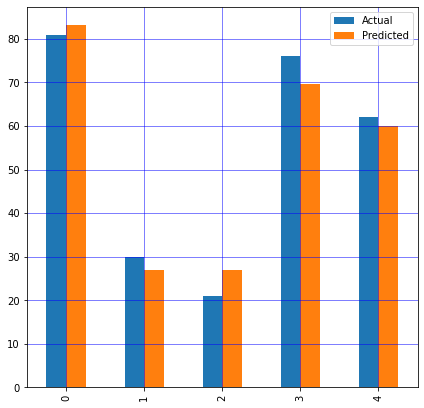

In [17]:
#plotting the grid to depict the actual and predicted value
df.plot(kind='bar', figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='blue')
plt.grid(which='minor', linewidth='0.5', color='green')
plt.show()


In [18]:
#Test with some new data
hours = 9.25
test = np.array(hours)
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of hours = 9.25
Predicted Score = [92.38611528]


# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well the different algorithms perform on a particular dataset.

In [20]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-2:", metrics.r2_score(y_test, y_pred))


Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
R-2: 0.9678055545167994


From the above R-squared value, the algorithm has been proven good for the given data.


The model's accuracy is 96.78%.

# Thank You!!